In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [2]:
from sklearn.metrics import r2_score

# Loading data

In [7]:
# This dataset has 216 features
df = pd.read_csv('pa_overpass_features_plus_target_aadt_191006.csv')
# This dataset has 16 features
#df = pd.read_csv("vt_overpass_minimized_features_normal_target.csv", index_col=0)

In [48]:
df.dropna(axis=0, subset=['collision_per_aadt'], inplace=True)

In [49]:
df.shape

(9996, 820)

In [50]:
df.head()

,area_aeroway.aerodrome,area_aeroway.approach_light,area_aeroway.apron,area_aeroway.hangar,area_aeroway.helipad,area_aeroway.holding_position,area_aeroway.model_aerodrome,area_aeroway.parking_position,area_aeroway.runway,area_aeroway.taxiway,...,road_surface.paved+wood,road_surface.paving_stones,road_surface.stone,road_surface.underConstruction,road_surface.unimproved,road_surface.unpaved,road_surface.wood,collision_per_aadt,y_trans,y_trans_1max
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000026,0.717546,0.100320
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000140,1.777987,0.248581
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000223,2.073290,0.289867
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000727,2.827081,0.395255
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000143,1.793141,0.250700


# Normalizing Target Variable

In [79]:
from scipy.stats import boxcox

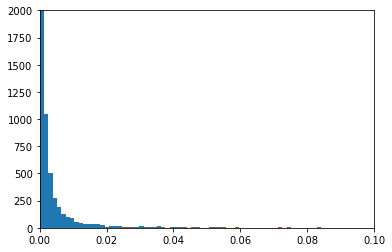

In [51]:
plt.hist(df['collision_per_aadt'], bins=500)
plt.ylim(0, 2000)
plt.xlim(0, 0.1)
None

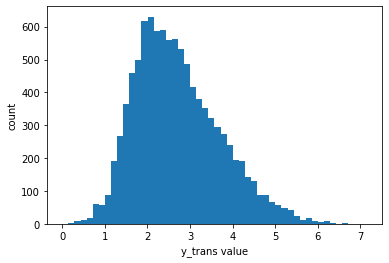

In [52]:
y_trans = np.log(df.collision_per_aadt)
# Scale with minimum and std
y_trans = (y_trans - y_trans.min()) / y_trans.std()
# Normalize values to range(0, 1)
#y_trans /= y_trans.max()
plt.hist(y_trans, bins=50)
plt.xlabel('y_trans value')
plt.ylabel('count')
#plt.savefig('target_norm.png')
None

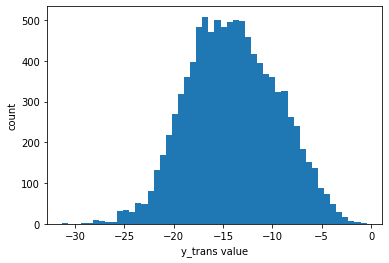

In [87]:
bc, _ = boxcox(df.collision_per_aadt, None)
plt.hist(bc, bins=50)
plt.xlabel('y_trans value')
plt.ylabel('count')
#plt.savefig('target_norm.png')
None

In [88]:
_

-0.1482695123446972

In [120]:
df['y_trans'] = bc
df['y_trans_1max'] = (bc - bc.min()) / (bc - bc.min()).max()

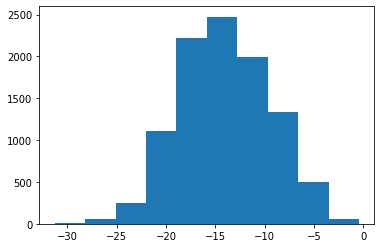

In [210]:
plt.hist(df.y_trans)
None

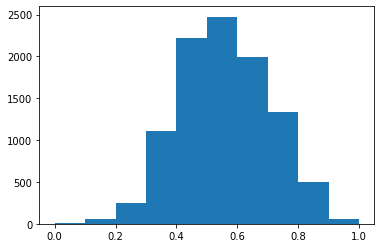

In [211]:
plt.hist(df.y_trans_1max)
None

# Applying min/max threshold to target

In [175]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [258]:
y_scaler = MinMaxScaler()
df_thresh = df[(df.y_trans_1max > 0.2) & (df.y_trans_1max < 0.9)].copy()
df_thresh['y_trans_1max'] = y_scaler.fit_transform(df_thresh['y_trans_1max'].values.reshape(-1, 1))

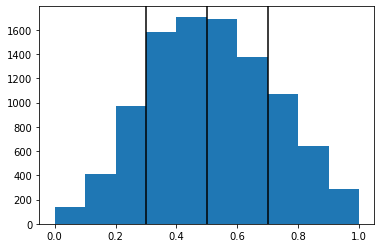

In [350]:
plt.hist(df_thresh.y_trans_1max)
plt.axvline(.5, color='k')
plt.axvline(.3, color='k')
plt.axvline(.7, color='k')

In [344]:
df_thresh.y_trans_1max.mean()

0.5143220995880903

In [346]:
df_thresh.y_trans_1max.std() / 2

0.10165762688382253

# Making X and y

In [250]:
X = df.copy().drop(['collision_per_aadt', 'y_trans', 'y_trans_1max'], axis=1)
y = df['y_trans'].values
y_1max = df['y_trans_1max'].values

In [260]:
X = df_thresh.copy().drop(['collision_per_aadt', 'y_trans', 'y_trans_1max'], axis=1)
y = df_thresh['y_trans'].values
y_1max = df_thresh['y_trans_1max'].values

In [310]:
X.head(1).to_csv("dummy_features.csv")

# Train & test

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y_1max, test_size=0.3, random_state=0)

In [340]:
X_train.shape

(6912, 817)

In [341]:
X_train.head()

,area_aeroway.aerodrome,area_aeroway.approach_light,area_aeroway.apron,area_aeroway.hangar,area_aeroway.helipad,area_aeroway.holding_position,area_aeroway.model_aerodrome,area_aeroway.parking_position,area_aeroway.runway,area_aeroway.taxiway,...,road_surface.metal_grate,road_surface.metal_grid,road_surface.paved,road_surface.paved+wood,road_surface.paving_stones,road_surface.stone,road_surface.underConstruction,road_surface.unimproved,road_surface.unpaved,road_surface.wood
5020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN
3404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# XGBoost
This works better with NaN values instead of filling with zeros. Weird.

In [58]:
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

## Predictions

### Not Standardized

In [328]:
# used to have 'hist' for tree method
model = XGBRegressor(objective ='reg:squarederror', n_estimators=290, learning_rate=.05, max_depth=5, alpha=0, random_state=0, tree_method='exact')
model.fit(X_train, y_train)

XGBRegressor(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=290,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, tree_method='exact',
             verbosity=1)

In [296]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [297]:
r2_score(y_train, y_train_pred)

0.6011679737789041

In [298]:
r2_score(y_test, y_pred)

0.42856380152620044

In [329]:
r2_score(y_train, y_train_pred)

0.6011679737789041

In [330]:
r2_score(y_test, y_pred)

0.42856380152620044

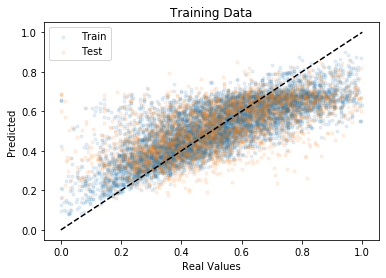

In [302]:
plt.scatter(y_train, y_train_pred, marker='.', alpha=.1, label='Train')
plt.scatter(y_test, y_pred, marker='.', alpha=.1, label='Test')
_ = np.linspace(0, 1, 10)
plt.plot(_, _, 'k--')
#plt.axvline(0.2, color='red', linestyle='--')
#plt.axvline(0.9, color='red', linestyle='--')
plt.xlabel("Real Values")
plt.ylabel("Predicted")
plt.title('Training Data')
plt.legend()
#plt.savefig('xgboost_real_vs_prediction_191001.png')
None

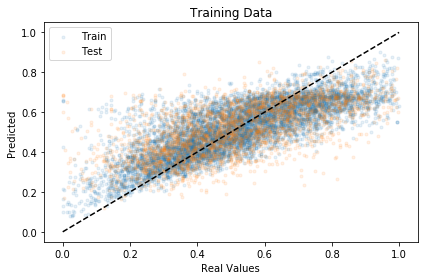

In [362]:
plt.scatter(y_train, y_train_pred, marker='.', alpha=.1, label='Train')
plt.scatter(y_test, y_pred, marker='.', alpha=.1, label='Test')
_ = np.linspace(0, 1, 10)
plt.plot(_, _, 'k--')
#plt.axvline(0.2, color='red', linestyle='--')
#plt.axvline(0.9, color='red', linestyle='--')
plt.xlabel("Real Values")
plt.ylabel("Predicted")
plt.title('Training Data')
plt.legend()
plt.tight_layout()
#plt.savefig('xgboost_real_vs_prediction_191007.png')
None

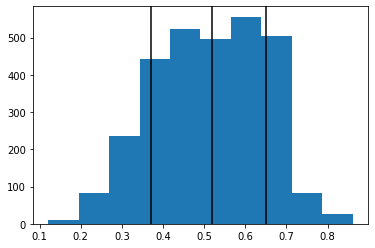

In [359]:
plt.hist(y_pred)
plt.axvline(0.52, color='k')
plt.axvline(0.65, color='k')
plt.axvline(0.37, color='k')
None

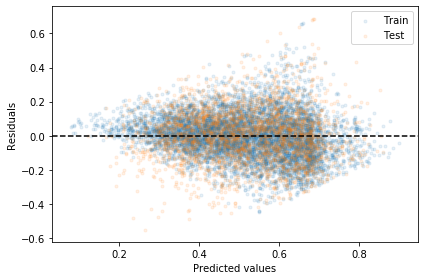

In [361]:
plt.scatter(y_train_pred, y_train_pred - y_train, label='Train', alpha=.1, marker='.')
plt.scatter(y_pred, y_pred - y_test, label='Test', alpha=.1, marker='.')
plt.axhline(0, color='k', ls='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend()
plt.tight_layout()
#plt.savefig('191007_xgboost_predicted_vs_residuals')
None

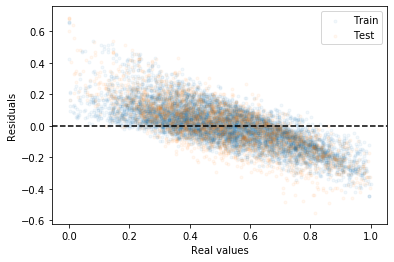

In [333]:
plt.scatter(y_train, y_train_pred - y_train, label='Train', alpha=.05, marker='.')
plt.scatter(y_test, y_pred - y_test, label='Test', alpha=.05, marker='.')
plt.axhline(0, color='k', ls='--')
plt.xlabel("Real values")
plt.ylabel("Residuals")
plt.legend()
None

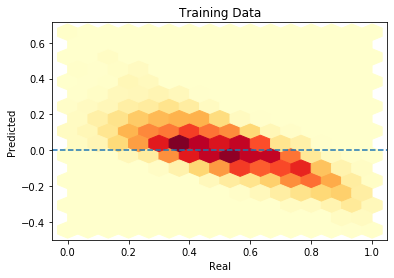

In [334]:
plt.hexbin(y_train, y_train_pred - y_train, alpha=1, gridsize=15, cmap='YlOrRd')
#plt.hexbin(y_test, y_pred, alpha=.5)
plt.axhline(0, linestyle='--')
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.title('Training Data')
None

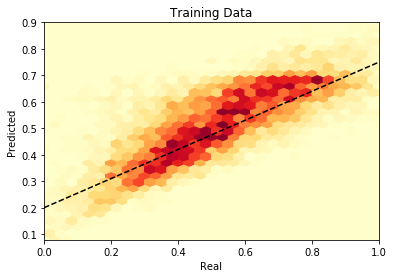

In [335]:
plt.hexbin(y_train, y_train_pred, alpha=1, gridsize=30, cmap='YlOrRd')
#plt.hexbin(y_test, y_pred, alpha=.5)
_x = np.linspace(0, 1, 10)
_y = np.linspace(.2, .75, 10)
plt.plot(_x, _y, 'k--')
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.title('Training Data')
None

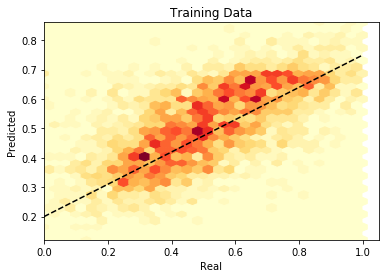

In [336]:
plt.hexbin(y_test, y_pred, alpha=1, gridsize=30, cmap='YlOrRd')
#plt.hexbin(y_test, y_pred, alpha=.5)
_x = np.linspace(0, 1, 10)
_y = np.linspace(.2, .75, 10)
plt.plot(_x, _y, 'k--')
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.title('Training Data')
None

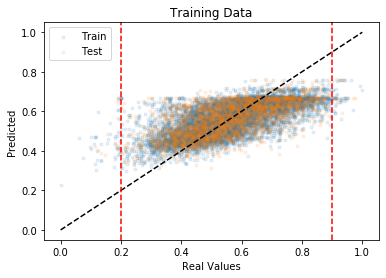

In [132]:
plt.scatter(y_train, y_train_pred, marker='.', alpha=.1, label='Train')
plt.scatter(y_test, y_pred, marker='.', alpha=.1, label='Test')
_ = np.linspace(0, 1, 10)
plt.plot(_, _, 'k--')
plt.axvline(0.2, color='red', linestyle='--')
plt.axvline(0.9, color='red', linestyle='--')
plt.xlabel("Real Values")
plt.ylabel("Predicted")
plt.title('Training Data')
plt.legend()
#plt.savefig('xgboost_real_vs_prediction_191001.png')
None

# Parameter Optimization

In [281]:
param_test2 = {'max_depth':range(5,25,10)}

gsearch2 = GridSearchCV(estimator = model,
                        cv=5, param_grid = param_test2, scoring=None, iid=False)

gsearch2.fit(X_train, y_train)
gsearch2.best_params_, gsearch2.best_score_


({'max_depth': 5}, 0.41497029955409237)

In [ ]:
XGBRegressor(objective ='reg:squarederror', n_estimators=100, learning_rate=.05, eta=.15, max_depth=3, alpha=0, random_state=0, tree_method='hist')

In [282]:
param_test2 = {'max_depth':range(1,6)}

gsearch2 = GridSearchCV(estimator = model,
                        cv=5, param_grid = param_test2, scoring=None, iid=False)

gsearch2.fit(X_train, y_train)
gsearch2.best_params_, gsearch2.best_score_


({'max_depth': 5}, 0.41497029955409237)

In [285]:
param_test4 = {'n_estimators':range(260, 310, 10)}

gsearch4 = GridSearchCV(estimator = XGBRegressor(objective ='reg:squarederror', n_estimators=100, learning_rate=.05, eta=.15, max_depth=5, alpha=0, random_state=0, tree_method='hist'),
                        cv=5, param_grid = param_test4, scoring=None, iid=False)

gsearch4.fit(X_train,y_train)
gsearch4.best_params_, gsearch4.best_score_

({'n_estimators': 290}, 0.4260997973692449)

In [287]:
np.linspace(0.0001, 1, 5)

array([1.00000e-04, 2.50075e-01, 5.00050e-01, 7.50025e-01, 1.00000e+00])

In [305]:
param_test5 = {'eta':[0, 1e-4]}

gsearch5 = GridSearchCV(estimator = XGBRegressor(objective ='reg:squarederror', n_estimators=290, learning_rate=.05, eta=.15, max_depth=5, alpha=0, random_state=0, tree_method='hist'),
                        cv=5, param_grid = param_test5, scoring=None, iid=False)

gsearch5.fit(X_train,y_train)
gsearch5.best_params_, gsearch5.best_score_

({'eta': 0}, 0.4260997973692449)

In [307]:
param_test6 = {'subsample':np.linspace(0.1, 1, 5)}

gsearch6 = GridSearchCV(estimator = XGBRegressor(objective ='reg:squarederror', n_estimators=290, learning_rate=.05, eta=0, max_depth=5, alpha=0, random_state=0, tree_method='hist'),
                        cv=5, param_grid = param_test6, scoring=None, iid=False)

gsearch6.fit(X_train,y_train)
gsearch6.best_params_, gsearch6.best_score_

({'subsample': 0.775}, 0.41704929887401965)

In [69]:
np.logspace(-6, 0, 5)

array([1.00000000e-06, 3.16227766e-05, 1.00000000e-03, 3.16227766e-02,
       1.00000000e+00])

In [311]:
#Learning rate
param_test1 = {'learning_rate':[1e-3, 5e-2, 1e-1]}

gsearch1 = GridSearchCV(estimator = XGBRegressor(objective ='reg:squarederror', n_estimators=290, learning_rate=.0325, eta=0, 
                                                 max_depth=5, alpha=0, random_state=0, tree_method='hist', subsample=0.775),
                        cv=5, param_grid = param_test1, scoring=None, iid=False)

gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_
##Learning rate of 0.05 is best

({'learning_rate': 0.05}, 0.42915679204959944)

In [312]:
#alpha rate
param_test1 = {'alpha':np.logspace(-6, 0, 5)}

gsearch1 = GridSearchCV(estimator = XGBRegressor(objective ='reg:squarederror', n_estimators=290, learning_rate=.05, eta=0, 
                                                 max_depth=5, alpha=0, random_state=0, tree_method='hist', subsample=0.775),
                        cv=5, param_grid = param_test1, scoring=None, iid=False)

gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_
##alpha of 0 is best

({'alpha': 1e-06}, 0.42915679204959944)

In [313]:
#gamma rate
param_test7 = {'gamma':[0.0, 0.5, 1.0, 2.0]}

gsearch7 = GridSearchCV(estimator = XGBRegressor(objective ='reg:squarederror', n_estimators=290, learning_rate=.05, eta=0, 
                                                 max_depth=5, alpha=0, random_state=0, tree_method='hist', subsample=0.775),
                        cv=5, param_grid = param_test7, scoring=None, iid=False)

gsearch7.fit(X_train,y_train)
gsearch7.best_params_, gsearch7.best_score_

({'gamma': 0.0}, 0.42915679204959944)

In [314]:
gsearch7.score(X_test, y_test)

0.43221281285502844

In [315]:
gsearch7.score(X_train, y_train)

0.6293661832047337

# Pickle the model

In [303]:
import pickle
pickle.dump(model, open("pa_deer_pred.pickle.dat", "wb"))